# Part 2: classification
### 1. Implement a system that can classify the absence (1) or presence (2) of heart disease (binary classification) 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
DATASET_FOLDER = 'HeartData'
DATASET_FILE = 'heart.csv'
DATASET_FILE_PATH = os.path.join(DATASET_FOLDER, DATASET_FILE)

In [3]:
data = pd.read_csv(DATASET_FILE_PATH)

In [4]:
data.shape

(270, 14)

In [5]:
data.head()

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [6]:
data.tail()

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal,presence
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1
269,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2


Attribute Information:
------------------------
      -- 1. age       
      -- 2. sex       
      -- 3. chest pain type  (4 values)       
      -- 4. resting blood pressure  
      -- 5. serum cholestoral in mg/dl      
      -- 6. fasting blood sugar > 120 mg/dl       
      -- 7. resting electrocardiographic results  (values 0,1,2) 
      -- 8. maximum heart rate achieved  
      -- 9. exercise induced angina    
      -- 10. oldpeak = ST depression induced by exercise relative to rest   
      -- 11. the slope of the peak exercise ST segment     
      -- 12. number of major vessels (0-3) colored by flourosopy        
      -- 13.  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect    
      -- 14. presence 1 or 2



In [7]:
data.describe()

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal,presence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
age               270 non-null float64
sex               270 non-null float64
chest_pain        270 non-null float64
blood_press       270 non-null float64
serum_chol        270 non-null float64
blood_sugar       270 non-null float64
electrocard       270 non-null float64
max_heart_rate    270 non-null float64
induced_ang       270 non-null float64
oldpeak           270 non-null float64
peak_st_seg       270 non-null float64
major_ves         270 non-null float64
thal              270 non-null float64
presence          270 non-null int64
dtypes: float64(13), int64(1)
memory usage: 29.6 KB


Another way to check null values:

In [9]:
data.isnull().sum()

age               0
sex               0
chest_pain        0
blood_press       0
serum_chol        0
blood_sugar       0
electrocard       0
max_heart_rate    0
induced_ang       0
oldpeak           0
peak_st_seg       0
major_ves         0
thal              0
presence          0
dtype: int64

## Split TRAIN and TEST set and do not touch TEST set till the testing

80% to 20%

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print('Training data:', train_set.shape)
print('Test data: ', test_set.shape)

Training data: (216, 14)
Test data:  (54, 14)


Preserve COPY of data for doing PCA

In [12]:
train_set_COPY = train_set.copy()
test_set_COPY = test_set.copy()

## Data analysis

In [13]:
data = train_set.copy()

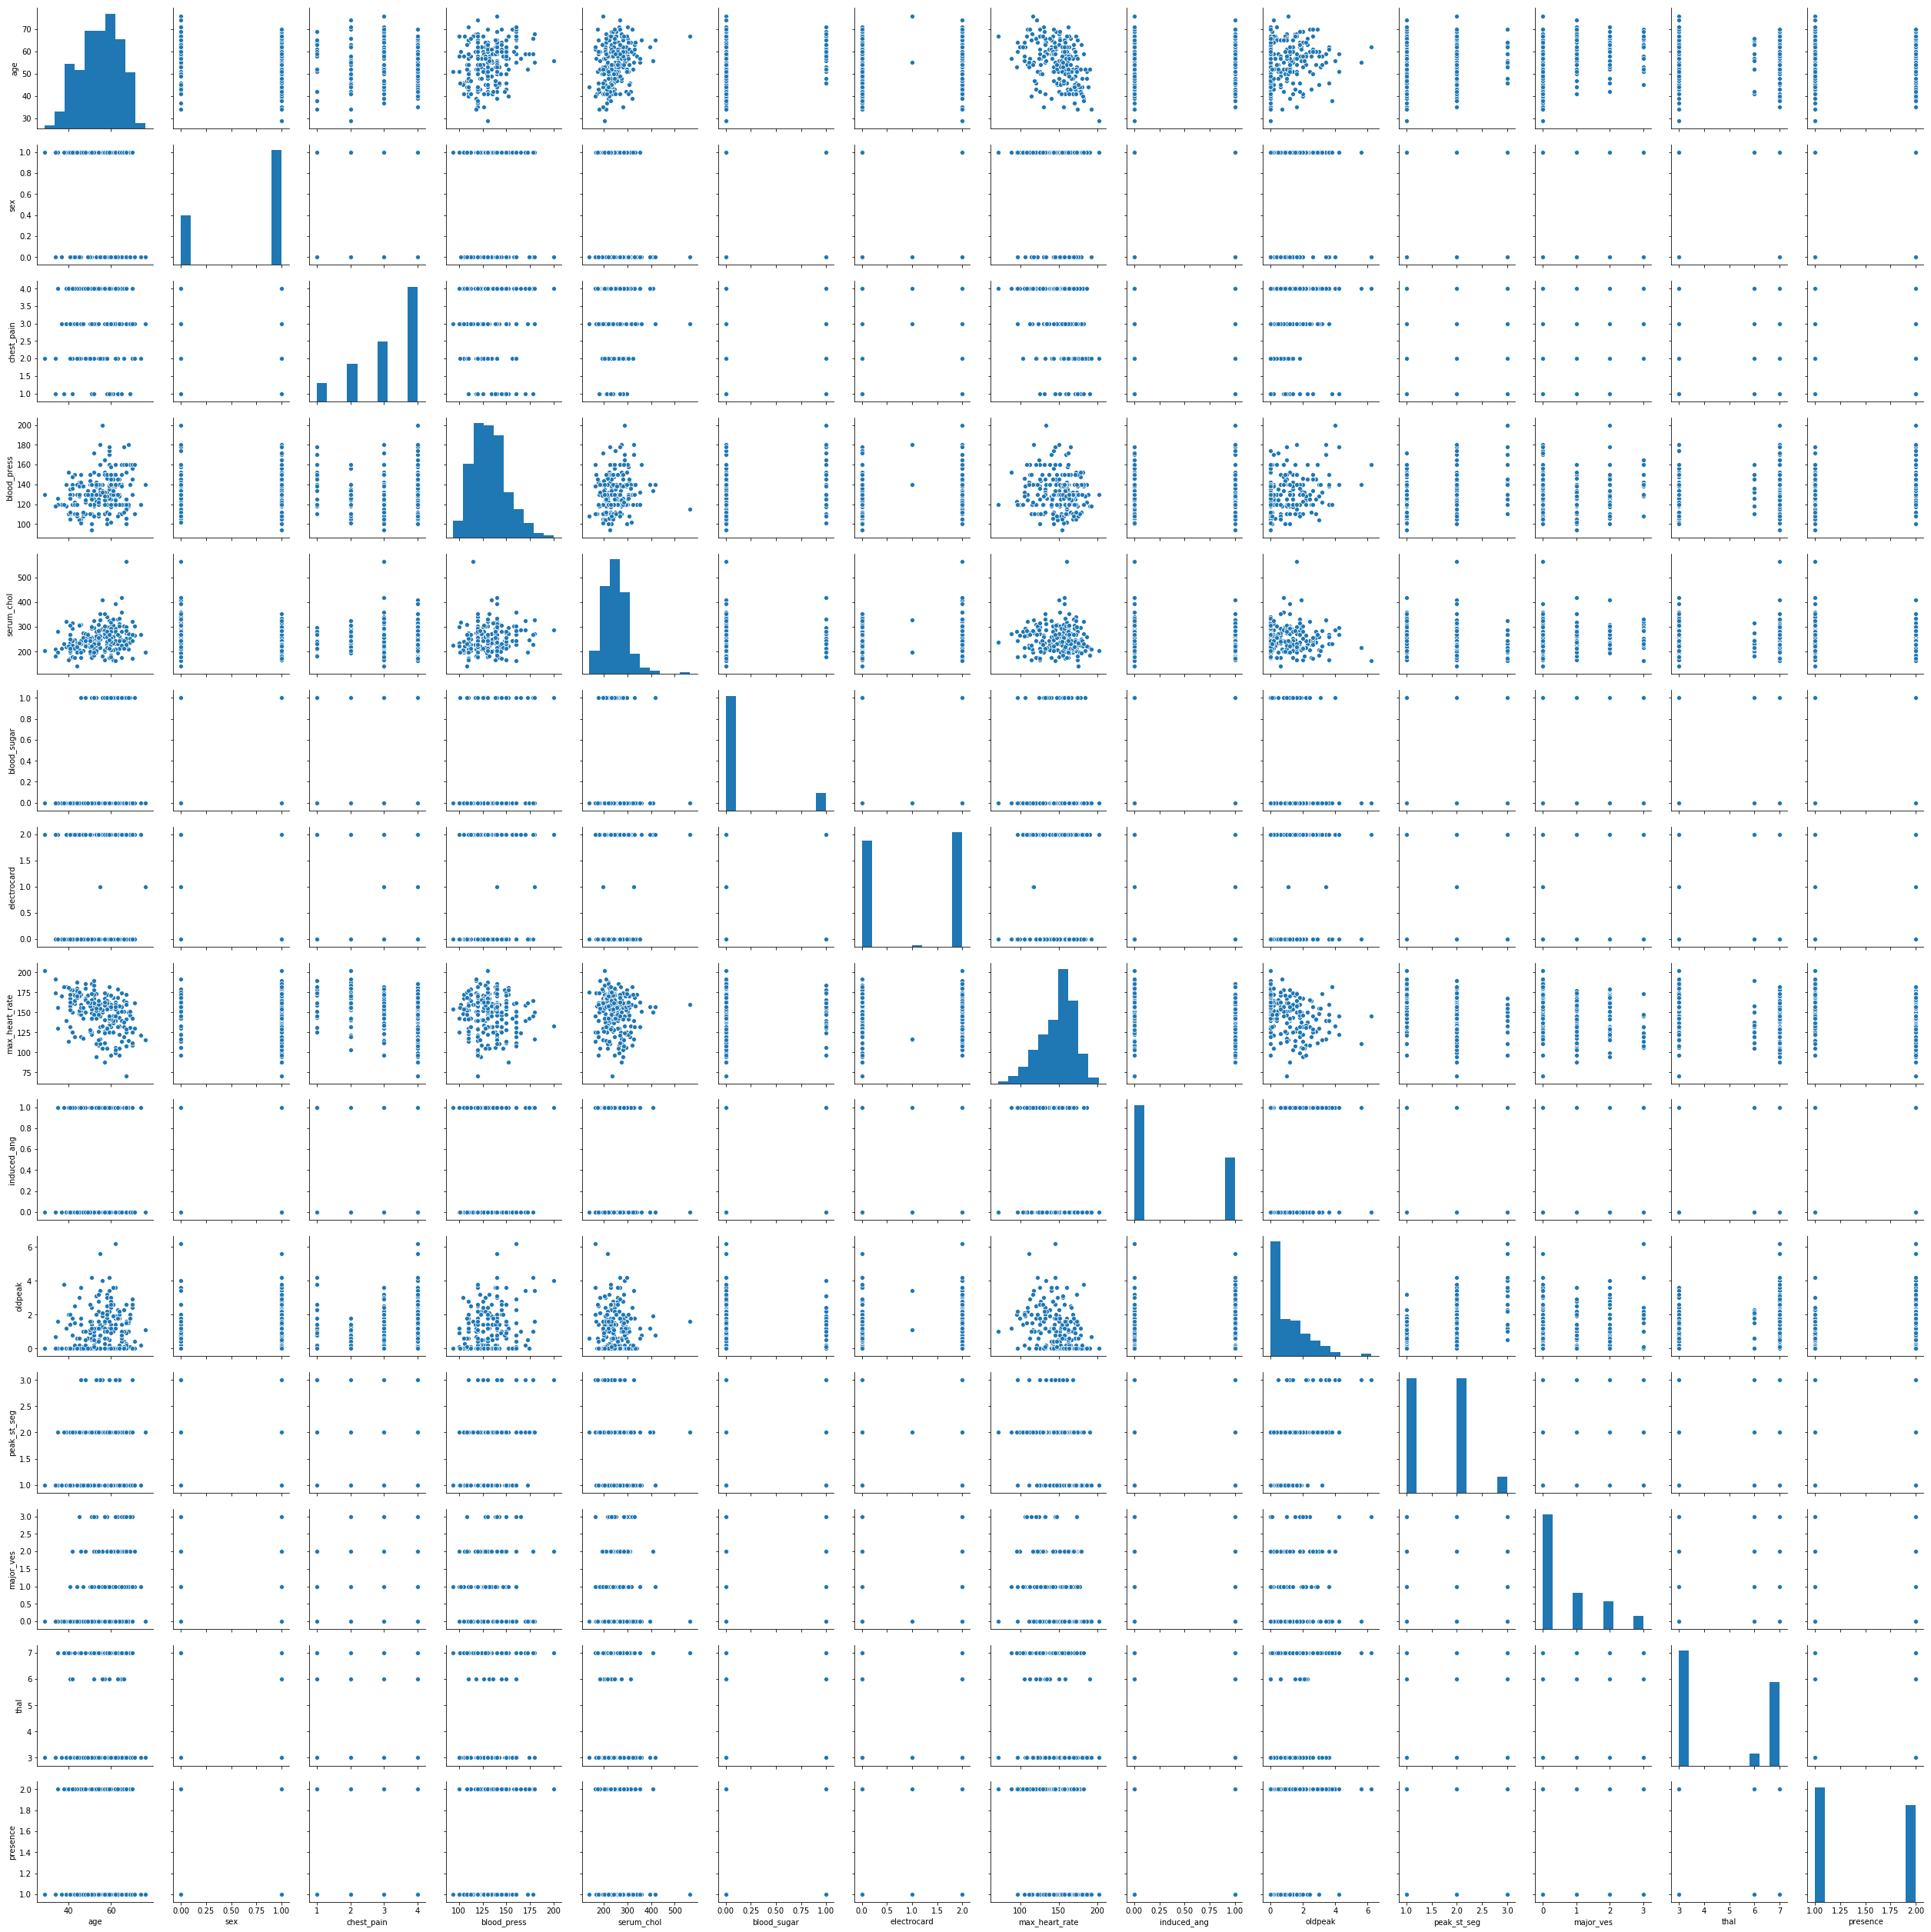

In [14]:
sns.pairplot(data)

More clear look:

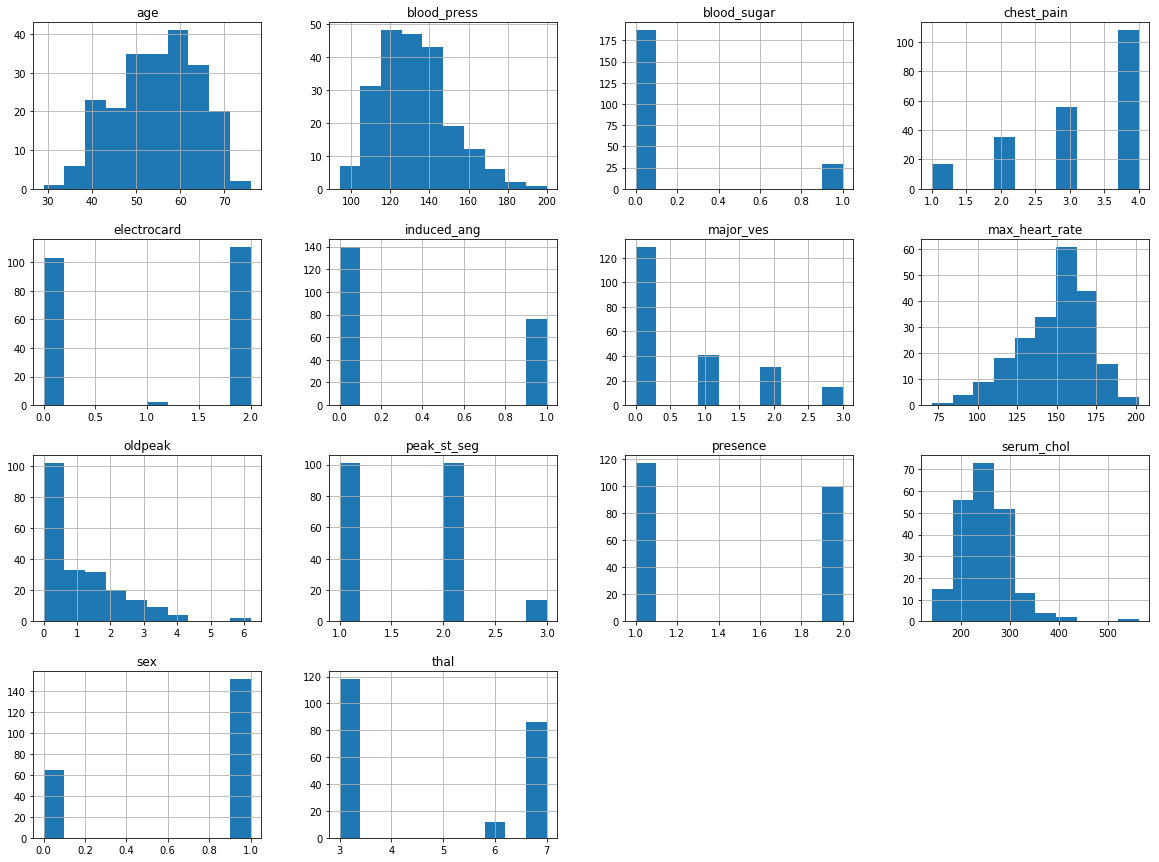

In [15]:
data.hist(figsize=(20,15))
plt.show()

Looks like we don't have outliers here...

Let's analyze correlations among features

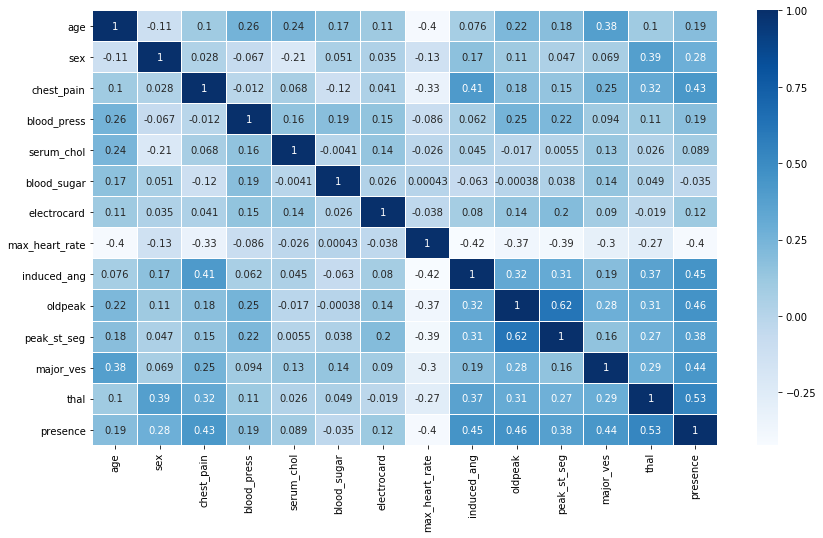

In [16]:
corr_matrix = data.corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix, linewidths=.01, annot = True, cmap='Blues')
plt.show()

In [17]:
corr_matrix['presence'].sort_values(ascending=False)

presence          1.000000
thal              0.530005
oldpeak           0.455766
induced_ang       0.450750
major_ves         0.437676
chest_pain        0.431482
peak_st_seg       0.379881
sex               0.279393
age               0.193232
blood_press       0.186431
electrocard       0.115210
serum_chol        0.088730
blood_sugar      -0.035203
max_heart_rate   -0.402942
Name: presence, dtype: float64

We can clearly see that most of the features affect the presence of heart disease

The strongest correlation is with **thal, oldpeak, included_ang, major_ves, chest_pain and max_heart_rate**

The weakest correlation is with **serum_chol and blood_sugar**

## Separate data from labels and standartization

In [18]:
data_labels = data['presence'].copy()

In [19]:
data_labels.head()

115    1
33     2
184    1
142    2
197    1
Name: presence, dtype: int64

In [20]:
data = data.drop('presence', axis=1)

In [21]:
data.head()

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal
115,49.0,0.0,2.0,134.0,271.0,0.0,0.0,162.0,0.0,0.0,2.0,0.0,3.0
33,59.0,1.0,4.0,170.0,326.0,0.0,2.0,140.0,1.0,3.4,3.0,0.0,7.0
184,53.0,1.0,3.0,130.0,246.0,1.0,2.0,173.0,0.0,0.0,1.0,3.0,3.0
142,50.0,1.0,3.0,140.0,233.0,0.0,0.0,163.0,0.0,0.6,2.0,1.0,7.0
197,54.0,0.0,3.0,110.0,214.0,0.0,0.0,158.0,0.0,1.6,2.0,0.0,3.0


In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [23]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [24]:
num_attributes = list(data.columns)
transform_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attributes),
    ])

In [25]:
data_prepared = transform_pipeline.fit_transform(data)

In [26]:
data_prepared

array([[-0.63296991, -1.52416434, -1.21490572, ...,  0.66200384,
        -0.71458405, -0.90541914],
       [ 0.46519475,  0.65609723,  0.8432875 , ...,  2.30559959,
        -0.71458405,  1.15321806],
       [-0.19370404,  0.65609723, -0.18580911, ..., -0.98159191,
         2.4141353 , -0.90541914],
       ...,
       [ 0.24556182, -1.52416434,  0.8432875 , ..., -0.98159191,
        -0.71458405, -0.90541914],
       [-0.41333698,  0.65609723, -0.18580911, ...,  0.66200384,
        -0.71458405, -0.90541914],
       [-0.63296991, -1.52416434,  0.8432875 , ..., -0.98159191,
        -0.71458405, -0.90541914]])

In [27]:
data_prepared.shape

(216, 13)

In [28]:
data.shape

(216, 13)

In [29]:
data_labels.shape

(216,)

# Training

5 classification algorithms (Logistic regression, SVM, decision tree, random forest, K-nn) 

Evaluate the algorithms using the following metrics( accuracy, precision, recall, and F1)

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [31]:
def evaluate_on_metrics(true_labels, predictions):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)
    
    return accuracy, precision, recall, f1

## Logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log_reg = LogisticRegression()
log_reg.fit(data_prepared, data_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
log_predictions = log_reg.predict(data_prepared)

In [35]:
log_accuracy, log_precision, log_recall, log_f1 = evaluate_on_metrics(data_labels, log_predictions)

print('LOGISTIC REGRESSION PERFORMANCE ON TRAINING DATASET')
print('Accuracy: ', log_accuracy,'\nPrecision: ', log_precision, '\nRecall: ', log_recall, '\nF1 score: ', log_f1)

LOGISTIC REGRESSION PERFORMANCE ON TRAINING DATASET
Accuracy:  0.8379629629629629 
Precision:  0.8416666666666667 
Recall:  0.8632478632478633 
F1 score:  0.8523206751054853


In [36]:
print ("Confusion matrix:")
print (confusion_matrix(data_labels, log_predictions))

Confusion matrix:
[[101  16]
 [ 19  80]]



Confusion matrix explained

|#|Predicted 1| Predicted 2|
|--------|-----------|------------|
|Actual 1| 101       |16          |
|Actual 2| 19        |80          |



Terminology

True negative (TN): correctly predicted the patient has NO heart disease (actual value: No disease).

True positive (TP): correctly predicted patient has heart disease(actual value: disease).

False negative (FN): incorrectly predicted patient has NO heart disease (actual value: disease).

False positive (FP): incorrectly predicted patient has heart disease (actual value: No disease).


----
**Accuracy**: Overall, how often is the classifier correct? 

Accuracy = TP+TN/TP+FP+FN+TN


**Precision** - TP / # predicted positive = TP / (TP + FP)

**Recall** - TP / # actual positive = TP / (TP + FN)



## SVM

In [37]:
from sklearn.svm import SVC

In [38]:
svm = SVC(gamma='scale')
svm.fit(data_prepared, data_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
svm_predictions = svm.predict(data_prepared)

In [40]:
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_on_metrics(data_labels, svm_predictions)

print('SVM PERFORMANCE ON TRAINING DATASED')
print('Accuracy: ', svm_accuracy,'\nPrecision: ', svm_precision, '\nRecall: ', svm_recall, '\nF1 score: ', svm_f1)

SVM PERFORMANCE ON TRAINING DATASED
Accuracy:  0.9074074074074074 
Precision:  0.907563025210084 
Recall:  0.9230769230769231 
F1 score:  0.9152542372881355


In [41]:
print ("Confusion matrix:")
print (confusion_matrix(data_labels, svm_predictions))

Confusion matrix:
[[108   9]
 [ 11  88]]


WOW! Seems like SVM performs better than Logistic Regression

## Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
tree_class = DecisionTreeClassifier(random_state=42)
tree_class.fit(data_prepared, data_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [44]:
tree_class_predictions = tree_class.predict(data_prepared)

In [45]:
tree_class_accuracy, tree_class_precision, tree_class_recall, tree_class_f1 = evaluate_on_metrics(data_labels, tree_class_predictions)

print('DECISION TREE PERFORMANCE ON TRAINING DATASET')
print('Accuracy: ', tree_class_accuracy,'\nPrecision: ', tree_class_precision, '\nRecall: ', tree_class_recall, '\nF1 score: ', tree_class_f1)

DECISION TREE PERFORMANCE ON TRAINING DATASET
Accuracy:  1.0 
Precision:  1.0 
Recall:  1.0 
F1 score:  1.0


In [46]:
print ("Confusion matrix:")
print (confusion_matrix(data_labels, tree_class_predictions))

Confusion matrix:
[[117   0]
 [  0  99]]


OMG! 100% accuracy! But maybe we overfitted...

We can solve overfitting problem by specifying **max_depth** of the tree. I tried it, it gave better results, but not better than other classifiers, so I didn't include them.

Generate classification tree for Decision Tree Classifier:

In [47]:
from sklearn.tree import export_graphviz

tree_g = export_graphviz(tree_class, out_file='tree.dot', rounded = True, proportion = False, 
                precision = 2, filled = True)


In [48]:
!dot -Tpng tree.dot -o tree.png


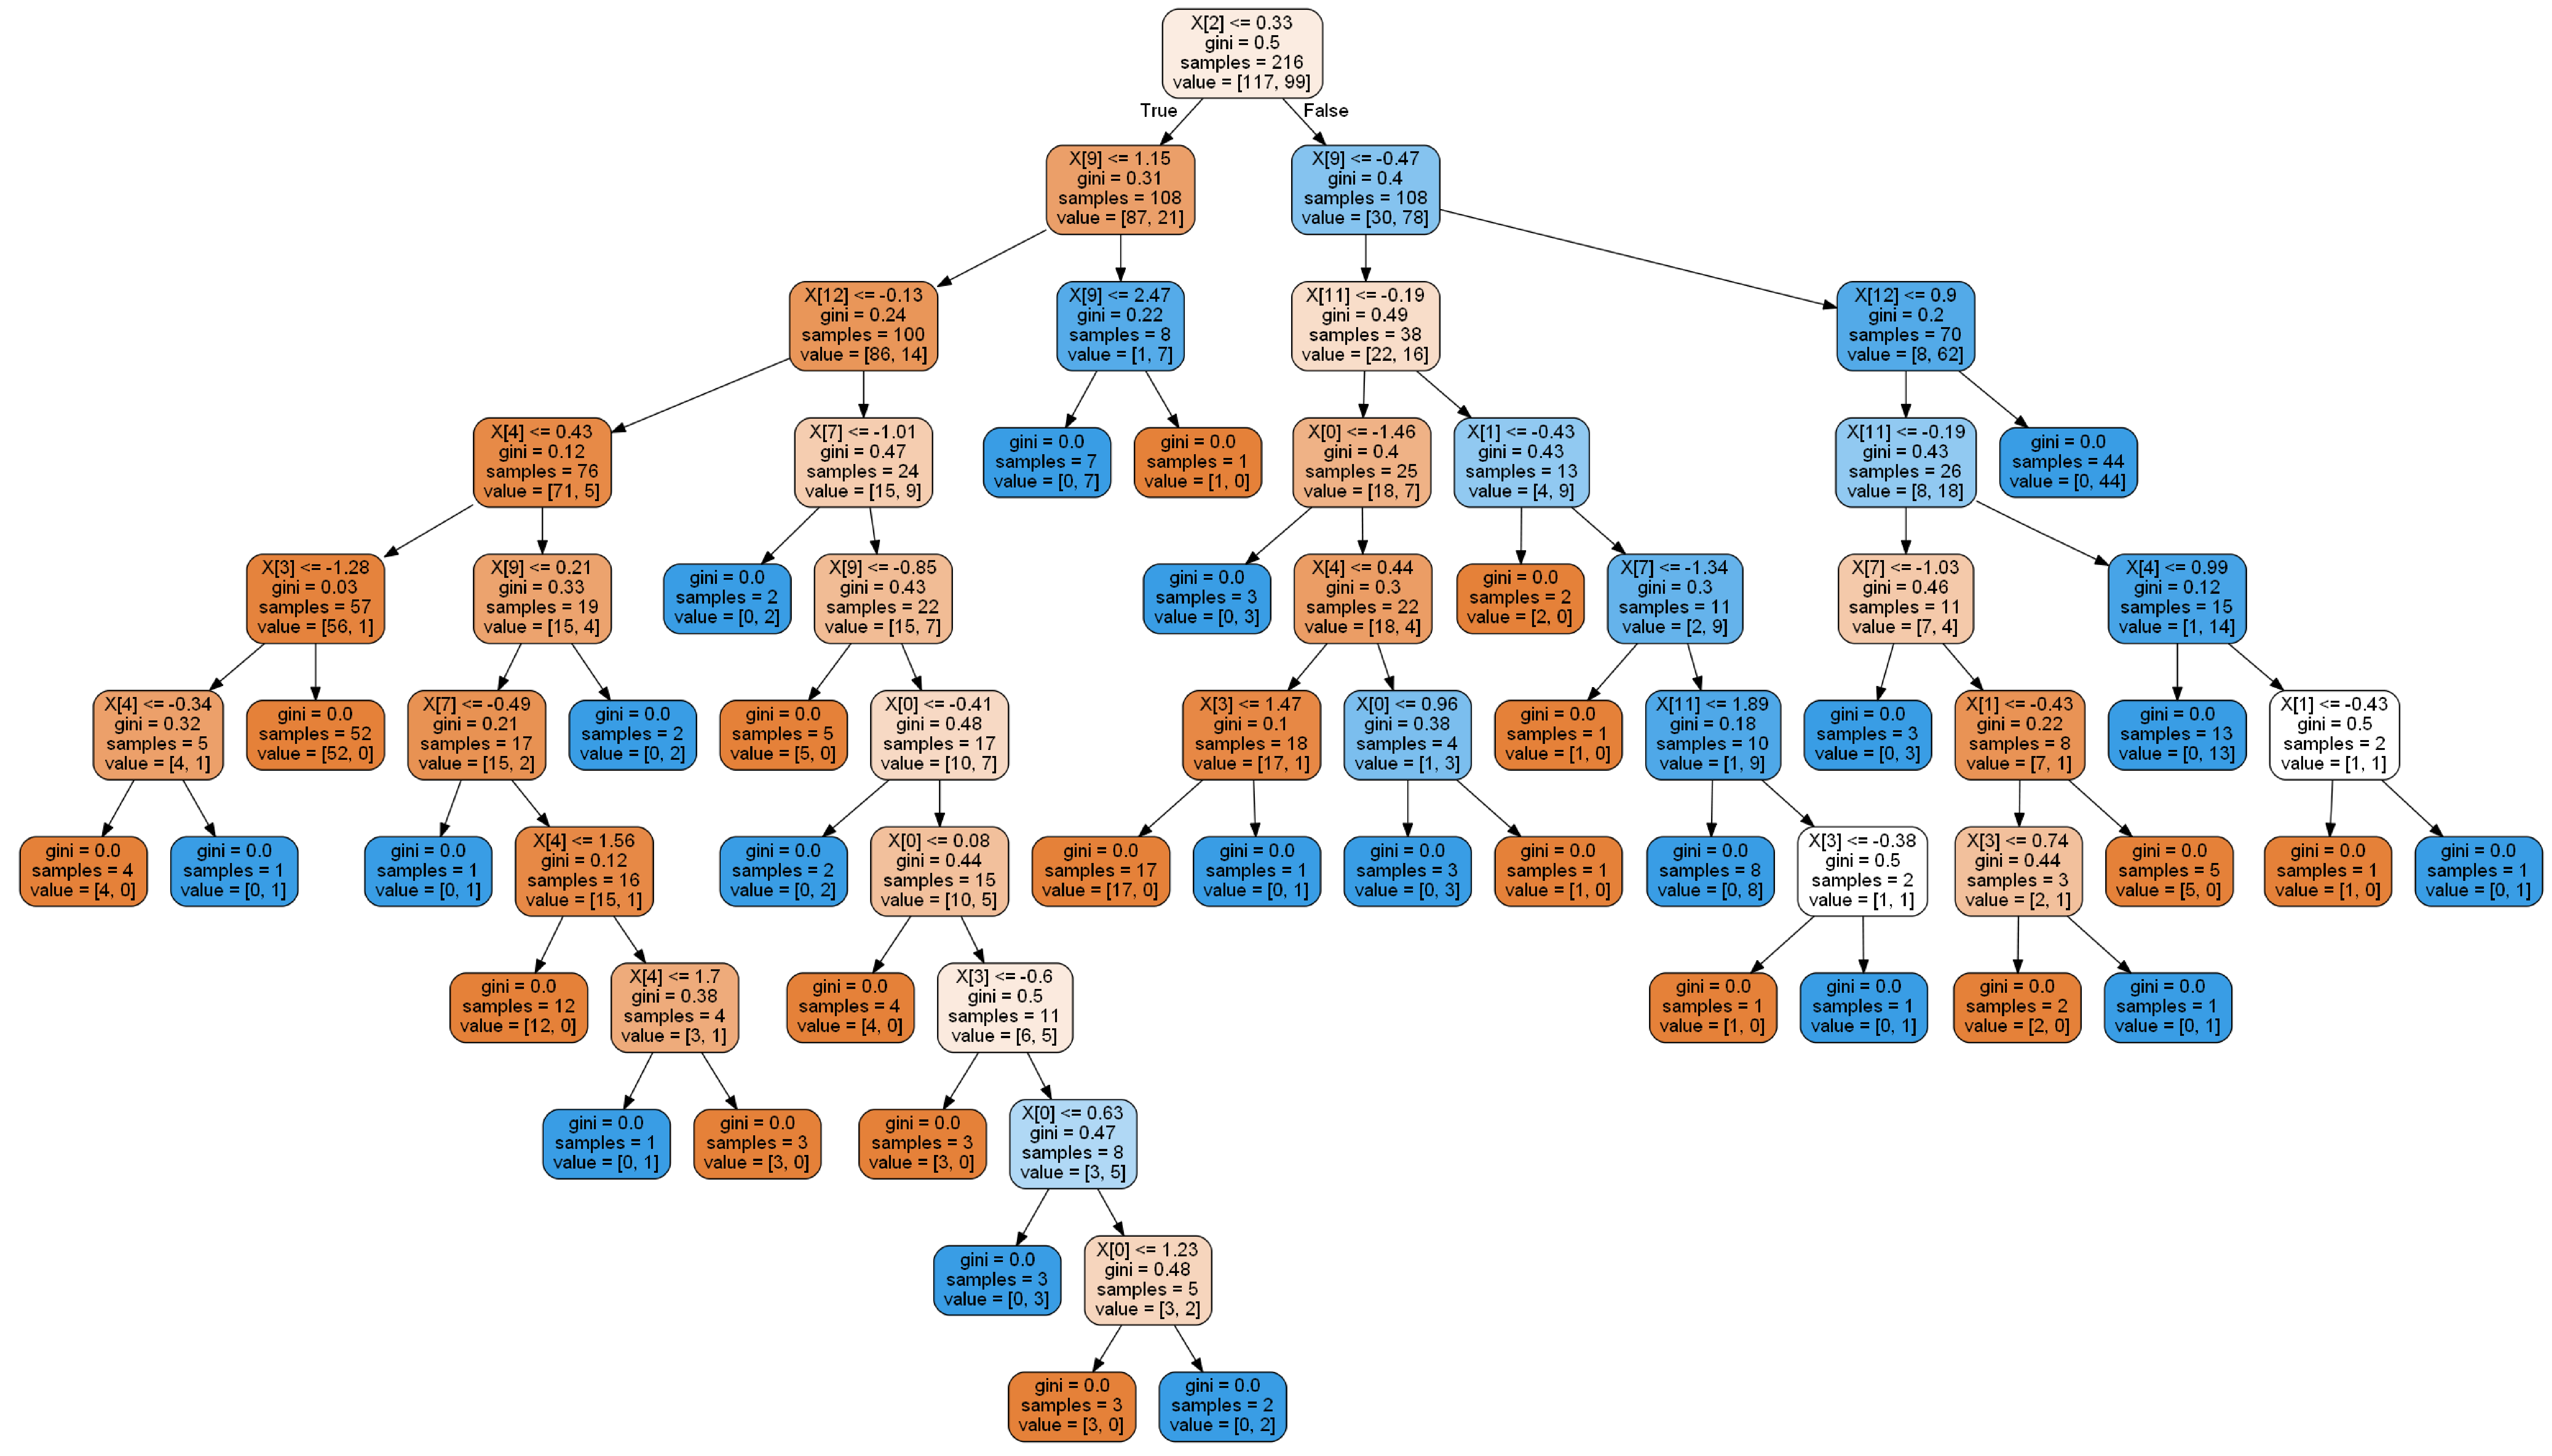

In [49]:
plt.figure(figsize = (120, 130))
plt.imshow(plt.imread('tree.png'))
plt.axis('off')
plt.show()

**graphviz** provides a simple pure-Python interface for the Graphviz graph-drawing software

This is the only library I had to install to my Anaconda environment through the console (*conda install python-graphviz*)



## Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(data_prepared, data_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [52]:
rf_class_predictions = rf_class.predict(data_prepared)

In [53]:
rf_class_accuracy, rf_class_precision, rf_class_recall, rf_class_f1 = evaluate_on_metrics(data_labels, rf_class_predictions)

print('RANDOM FOREST PERFORMANCE ON TRAINING DATASET')
print('Accuracy: ', rf_class_accuracy,'\nPrecision: ', rf_class_precision, '\nRecall: ',rf_class_recall, '\nF1 score: ', rf_class_f1)

RANDOM FOREST PERFORMANCE ON TRAINING DATASET
Accuracy:  0.9907407407407407 
Precision:  0.9831932773109243 
Recall:  1.0 
F1 score:  0.9915254237288135


In [54]:
print ("Confusion matrix:")
print (confusion_matrix(data_labels, rf_class_predictions))

Confusion matrix:
[[117   0]
 [  2  97]]


Again, amazing results...

## K-Nearest Neighbors

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data_prepared, data_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [57]:
knn_predictions = knn.predict(data_prepared)

In [58]:
knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate_on_metrics(data_labels, knn_predictions)

print('K-NEARESR NEIGHBORS PERFORMANCE ON TRAINING DATASED')
print('Accuracy: ', knn_accuracy,'\nPrecision: ', knn_precision, '\nRecall: ',knn_recall, '\nF1 score: ', knn_f1)

K-NEARESR NEIGHBORS PERFORMANCE ON TRAINING DATASED
Accuracy:  0.8935185185185185 
Precision:  0.8983050847457628 
Recall:  0.905982905982906 
F1 score:  0.902127659574468


In [59]:
print ("Confusion matrix:")
print (confusion_matrix(data_labels, knn_predictions))

Confusion matrix:
[[106  11]
 [ 12  87]]


Not bad...

# Evaluate on TEST dataset

In [60]:
data_test = test_set.copy()

In [61]:
data_test.head()

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal,presence
30,57.0,1.0,3.0,128.0,229.0,0.0,2.0,150.0,0.0,0.4,2.0,1.0,7.0,2
116,46.0,1.0,4.0,120.0,249.0,0.0,2.0,144.0,0.0,0.8,1.0,0.0,7.0,2
79,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,1
127,52.0,0.0,3.0,136.0,196.0,0.0,2.0,169.0,0.0,0.1,2.0,0.0,3.0,1
196,58.0,0.0,4.0,100.0,248.0,0.0,2.0,122.0,0.0,1.0,2.0,0.0,3.0,1


In [62]:
data_test_labels = data_test['presence'].copy()

In [63]:
data_test = data_test.drop(['presence'], axis=1)

In [64]:
data_test.head()

,age,sex,chest_pain,blood_press,serum_chol,blood_sugar,electrocard,max_heart_rate,induced_ang,oldpeak,peak_st_seg,major_ves,thal
30,57.0,1.0,3.0,128.0,229.0,0.0,2.0,150.0,0.0,0.4,2.0,1.0,7.0
116,46.0,1.0,4.0,120.0,249.0,0.0,2.0,144.0,0.0,0.8,1.0,0.0,7.0
79,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0
127,52.0,0.0,3.0,136.0,196.0,0.0,2.0,169.0,0.0,0.1,2.0,0.0,3.0
196,58.0,0.0,4.0,100.0,248.0,0.0,2.0,122.0,0.0,1.0,2.0,0.0,3.0


In [65]:
data_test_labels.head()

30     2
116    2
79     1
127    1
196    1
Name: presence, dtype: int64

In [66]:
data_test_prepared = transform_pipeline.fit_transform(data_test)

In [67]:
data_test_prepared

array([[ 4.36240809e-01,  8.29156198e-01, -1.74740811e-01,
        -9.31800277e-02, -3.54583616e-01, -5.05780539e-01,
         1.03774904e+00, -8.59434659e-02, -5.63092506e-01,
        -4.67153505e-01,  7.34976290e-01,  4.47213595e-01,
         1.35060650e+00],
       [-7.97697479e-01,  8.29156198e-01,  1.00475967e+00,
        -5.45469601e-01,  2.49508788e-02, -5.05780539e-01,
         1.03774904e+00, -3.34565635e-01, -5.63092506e-01,
        -6.02778716e-02, -8.52572496e-01, -7.02764221e-01,
         1.35060650e+00],
       [ 3.24064601e-01,  8.29156198e-01, -1.35424129e+00,
        -5.45469601e-01, -2.21746543e-01, -5.05780539e-01,
        -9.63624112e-01,  1.07429332e+00, -5.63092506e-01,
        -6.02778716e-02, -8.52572496e-01, -7.02764221e-01,
        -7.63386285e-01],
       [-1.24640231e-01, -1.20604538e+00, -1.74740811e-01,
         3.59109545e-01, -9.80815532e-01, -5.05780539e-01,
         1.03774904e+00,  7.01360070e-01, -5.63092506e-01,
        -7.72310230e-01,  7.34976290e

In [68]:
data_test_prepared.shape

(54, 13)

**Prediction with Logistic Regression**

In [69]:
log_predictions = log_reg.predict(data_test_prepared)

In [70]:
log_accuracy, log_precision, log_recall, log_f1 = evaluate_on_metrics(data_test_labels, log_predictions)

print('LOGISTIC REGRESSION PERFORMANCE ON TEST DATASED')
print('Accuracy: ', log_accuracy,'\nPrecision: ', log_precision, '\nRecall: ', log_recall, '\nF1 score: ', log_f1)

LOGISTIC REGRESSION PERFORMANCE ON TEST DATASED
Accuracy:  0.8703703703703703 
Precision:  0.9333333333333333 
Recall:  0.8484848484848485 
F1 score:  0.888888888888889


In [71]:
print ("Confusion matrix:")
print (confusion_matrix(data_test_labels, log_predictions))

Confusion matrix:
[[28  5]
 [ 2 19]]


**Prediction with SVM**

In [72]:
svm_predictions = svm.predict(data_test_prepared)

In [73]:
svm_accuracy, svm_precision, svm_recall, svm_f1 = evaluate_on_metrics(data_test_labels, svm_predictions)

print('SVM PERFORMANCE ON TEST DATASET')
print('Accuracy: ', svm_accuracy,'\nPrecision: ', svm_precision, '\nRecall: ', svm_recall, '\nF1 score: ', svm_f1)

SVM PERFORMANCE ON TEST DATASET
Accuracy:  0.8518518518518519 
Precision:  0.9310344827586207 
Recall:  0.8181818181818182 
F1 score:  0.8709677419354839


In [74]:
print ("Confusion matrix:")
print (confusion_matrix(data_test_labels, svm_predictions))

Confusion matrix:
[[27  6]
 [ 2 19]]


**Prediction with Decision Tree**

In [75]:
tree_class_predictions = tree_class.predict(data_test_prepared)

In [76]:
tree_class_accuracy, tree_class_precision, tree_class_recall, tree_class_f1 = evaluate_on_metrics(data_test_labels, tree_class_predictions)

print('DECISION TREE PERFORMANCE ON TEST DATASET')
print('Accuracy: ', tree_class_accuracy,'\nPrecision: ', tree_class_precision, '\nRecall: ', tree_class_recall, '\nF1 score: ', tree_class_f1)

DECISION TREE PERFORMANCE ON TEST DATASET
Accuracy:  0.7037037037037037 
Precision:  0.8148148148148148 
Recall:  0.6666666666666666 
F1 score:  0.7333333333333333


In [77]:
print ("Confusion matrix:")
print (confusion_matrix(data_test_labels, tree_class_predictions))

Confusion matrix:
[[22 11]
 [ 5 16]]


Decision Tree seems to perform bad on TEST set.

I think, this happened because of overfitting on TRAIN set. 

**Prediction with Random Forest**

In [78]:
rf_class_predictions = rf_class.predict(data_test_prepared)

In [79]:
rf_class_accuracy, rf_class_precision, rf_class_recall, rf_class_f1 = evaluate_on_metrics(data_test_labels, rf_class_predictions)

print('RANDOM FOREST PERFORMANCE ON TEST DATASET')
print('Accuracy: ', rf_class_accuracy,'\nPrecision: ', rf_class_precision, '\nRecall: ',rf_class_recall, '\nF1 score: ', rf_class_f1)

RANDOM FOREST PERFORMANCE ON TEST DATASET
Accuracy:  0.7962962962962963 
Precision:  0.8055555555555556 
Recall:  0.8787878787878788 
F1 score:  0.8405797101449276


In [80]:
print ("Confusion matrix:")
print (confusion_matrix(data_test_labels, rf_class_predictions))

Confusion matrix:
[[29  4]
 [ 7 14]]


**Prediction with KNN**

In [81]:
knn_predictions = knn.predict(data_test_prepared)

In [82]:
knn_accuracy, knn_precision, knn_recall, knn_f1 = evaluate_on_metrics(data_test_labels, knn_predictions)

print('K-NEAREST NEIGHBORS PERFORMANCE ON TEST DATASET')
print('Accuracy: ', knn_accuracy,'\nPrecision: ', knn_precision, '\nRecall: ',knn_recall, '\nF1 score: ', knn_f1)

K-NEAREST NEIGHBORS PERFORMANCE ON TEST DATASET
Accuracy:  0.8333333333333334 
Precision:  0.875 
Recall:  0.8484848484848485 
F1 score:  0.8615384615384615


In [83]:
print ("Confusion matrix:")
print (confusion_matrix(data_test_labels, knn_predictions))

Confusion matrix:
[[28  5]
 [ 4 17]]


# Overall evaluation

We learned how to use different ML classifier. Next we will use Python script to comapre different classifiers (adapted from Kaggle).

In [84]:
from sklearn.metrics import roc_curve
from sklearn import metrics

Create a dictionary of classifiers

In [85]:
classifier_collection = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(gamma='scale'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Nearest Neighbors": KNeighborsClassifier(n_neighbors=3)
}

Dictionaries of scores

In [86]:
accuracy_score_dict = {}
precision_score_dict = {}
recall_score_dict = {}
f1_score_dict = {}
roc_auc_dict = {}
confusion_matrix_dict = {}

Before I trained all models one by one, but now I'll train them all and obtain scores

In [87]:
count=0

for classifier_model, classifier in (classifier_collection.items()):

    count +=1
    classifier.fit(data_prepared,data_labels)
    predicted = classifier.predict(data_test_prepared)
    accuracy_score_dict[classifier_model] = {'accuracy_score' :  accuracy_score(data_test_labels, predicted)}
    precision_score_dict[classifier_model] = {'precision_score' :  precision_score(data_test_labels, predicted)}
    recall_score_dict[classifier_model] = {'recall_score' :  recall_score(data_test_labels, predicted)}
    f1_score_dict[classifier_model] = {'f1_score' :  f1_score(data_test_labels, predicted)}
    confusion_matrix_dict[classifier_model] = {'matrix' : confusion_matrix(data_test_labels, predicted)}
    roc_auc_dict[classifier_model] = {'roc-auc' : metrics.roc_auc_score(data_test_labels, predicted)}



In [88]:
accuracy_score_dict

{'Logistic Regression': {'accuracy_score': 0.8703703703703703},
 'SVM': {'accuracy_score': 0.8518518518518519},
 'Decision Tree': {'accuracy_score': 0.7037037037037037},
 'Random Forest': {'accuracy_score': 0.7962962962962963},
 'Nearest Neighbors': {'accuracy_score': 0.8333333333333334}}

In [89]:
precision_score_dict

{'Logistic Regression': {'precision_score': 0.9333333333333333},
 'SVM': {'precision_score': 0.9310344827586207},
 'Decision Tree': {'precision_score': 0.8148148148148148},
 'Random Forest': {'precision_score': 0.8055555555555556},
 'Nearest Neighbors': {'precision_score': 0.875}}

In [90]:
recall_score_dict

{'Logistic Regression': {'recall_score': 0.8484848484848485},
 'SVM': {'recall_score': 0.8181818181818182},
 'Decision Tree': {'recall_score': 0.6666666666666666},
 'Random Forest': {'recall_score': 0.8787878787878788},
 'Nearest Neighbors': {'recall_score': 0.8484848484848485}}

In [91]:
f1_score_dict

{'Logistic Regression': {'f1_score': 0.888888888888889},
 'SVM': {'f1_score': 0.8709677419354839},
 'Decision Tree': {'f1_score': 0.7333333333333333},
 'Random Forest': {'f1_score': 0.8405797101449276},
 'Nearest Neighbors': {'f1_score': 0.8615384615384615}}

In [92]:
confusion_matrix_dict

{'Logistic Regression': {'matrix': array([[28,  5],
         [ 2, 19]], dtype=int64)}, 'SVM': {'matrix': array([[27,  6],
         [ 2, 19]], dtype=int64)}, 'Decision Tree': {'matrix': array([[22, 11],
         [ 5, 16]], dtype=int64)}, 'Random Forest': {'matrix': array([[29,  4],
         [ 7, 14]], dtype=int64)}, 'Nearest Neighbors': {'matrix': array([[28,  5],
         [ 4, 17]], dtype=int64)}}

In [93]:
roc_auc_dict

{'Logistic Regression': {'roc-auc': 0.8766233766233766},
 'SVM': {'roc-auc': 0.8614718614718614},
 'Decision Tree': {'roc-auc': 0.7142857142857143},
 'Random Forest': {'roc-auc': 0.7727272727272727},
 'Nearest Neighbors': {'roc-auc': 0.8290043290043291}}

# PCA [BONUS]

Now I'll conduct the same classification task mentioned above but after preprocessing data using PCA

In [94]:
train_set_COPY = train_set_COPY.drop(['presence'], axis=1)
test_set_COPY = test_set_COPY.drop(['presence'], axis=1)

In [95]:
from sklearn.decomposition import PCA

In [96]:
data_reduced = train_set_COPY.copy()
data_test_reduced = test_set_COPY.copy()

pca = PCA(n_components=0.95)

data_reduced = pca.fit_transform(data_reduced)
data_test_reduced = pca.fit_transform(data_test_reduced)

In [97]:
data_test_reduced[0]

array([-18.67770179,   2.50758272,   1.30868263])

In [98]:
accuracy_score_dict_PCA = {}
f1_score_dict_PCA  = {}

In [99]:
count=0

for classifier_model, classifier in (classifier_collection.items()):

    count +=1
    classifier.fit(data_reduced,data_labels)
    predicted = classifier.predict(data_test_reduced)
    accuracy_score_dict_PCA [classifier_model] = {'accuracy_score' :  accuracy_score(data_test_labels, predicted)}
    f1_score_dict_PCA [classifier_model] = {'f1_score' :  f1_score(data_test_labels, predicted)}


In [100]:
accuracy_score_dict_PCA 

{'Logistic Regression': {'accuracy_score': 0.7592592592592593},
 'SVM': {'accuracy_score': 0.7037037037037037},
 'Decision Tree': {'accuracy_score': 0.6851851851851852},
 'Random Forest': {'accuracy_score': 0.6481481481481481},
 'Nearest Neighbors': {'accuracy_score': 0.6296296296296297}}

In [101]:
f1_score_dict_PCA

{'Logistic Regression': {'f1_score': 0.7936507936507938},
 'SVM': {'f1_score': 0.7500000000000001},
 'Decision Tree': {'f1_score': 0.721311475409836},
 'Random Forest': {'f1_score': 0.6984126984126984},
 'Nearest Neighbors': {'f1_score': 0.6774193548387097}}

It is clearly seen that Dimension Reduction with Principal Component Analysis (PCA) made our results even worse...


So we'll keep the results WITHOUT PCA

## Visualization of our results

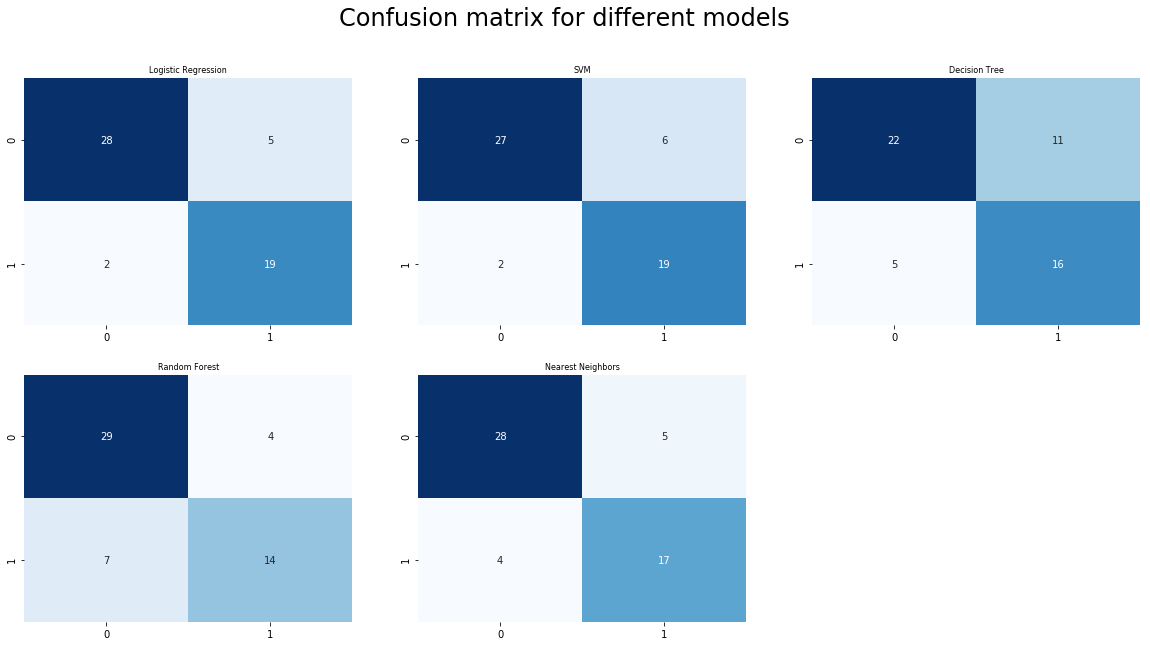

In [102]:
plt.figure(figsize=(20,10))
plt.suptitle("Confusion matrix for different models",fontsize=24)

n = 0
for classifier, class_score in confusion_matrix_dict.items():
    for item, score in class_score.items():
        n +=1
        plt.subplot(2, 3, n) 
        plt.title(classifier, fontsize=8)
        sns.heatmap(score,annot=True,cbar=False,cmap="Blues",fmt="d")



Our model better classifies THE ABSENCE of heart disease than its PRESENCE

(0, 1)

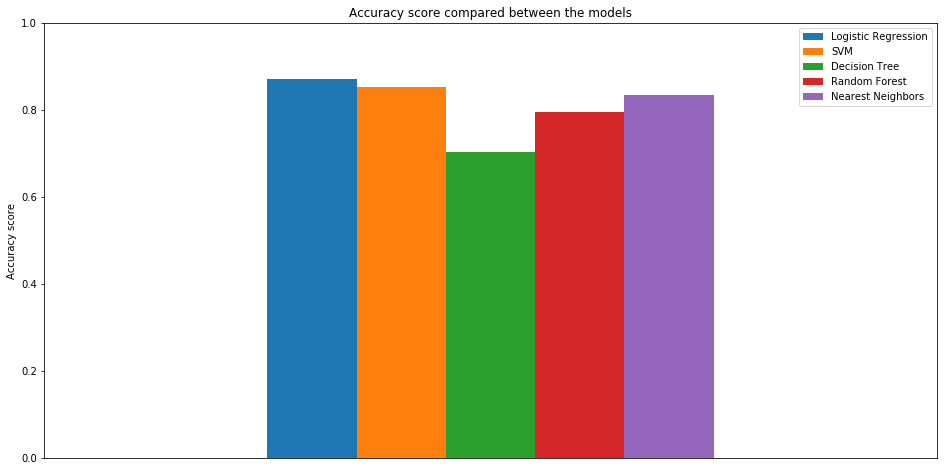

In [103]:
ax = pd.DataFrame(accuracy_score_dict).plot(kind='bar', figsize=(16,8), title="Accuracy score compared between the models")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel("Accuracy score")
ax.set_ylim(0,1)

(0, 1)

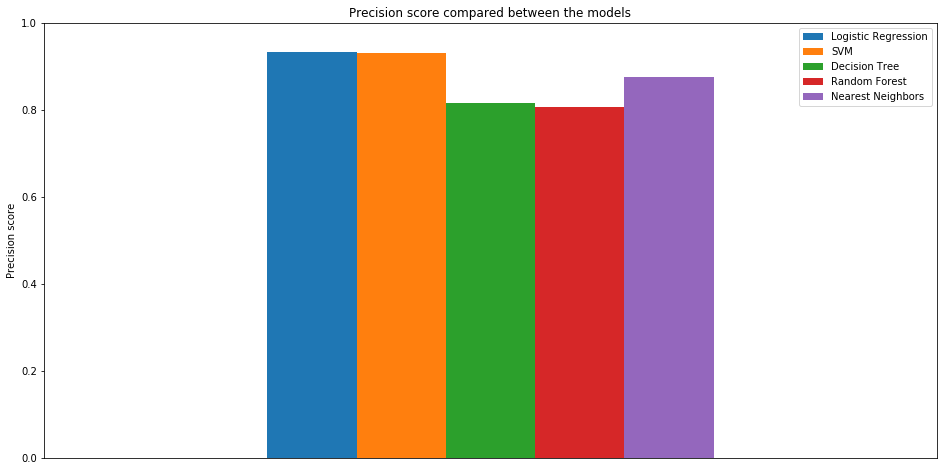

In [104]:
ax = pd.DataFrame(precision_score_dict).plot(kind='bar', figsize=(16,8), title="Precision score compared between the models")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel("Precision score")
ax.set_ylim(0,1)

(0, 1)

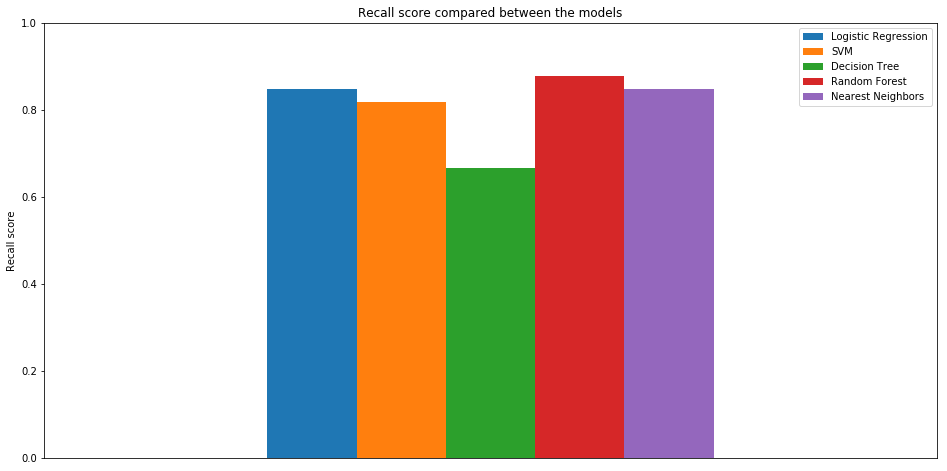

In [105]:
ax = pd.DataFrame(recall_score_dict).plot(kind='bar', figsize=(16,8), title="Recall score compared between the models")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel("Recall score")
ax.set_ylim(0,1)

(0, 1)

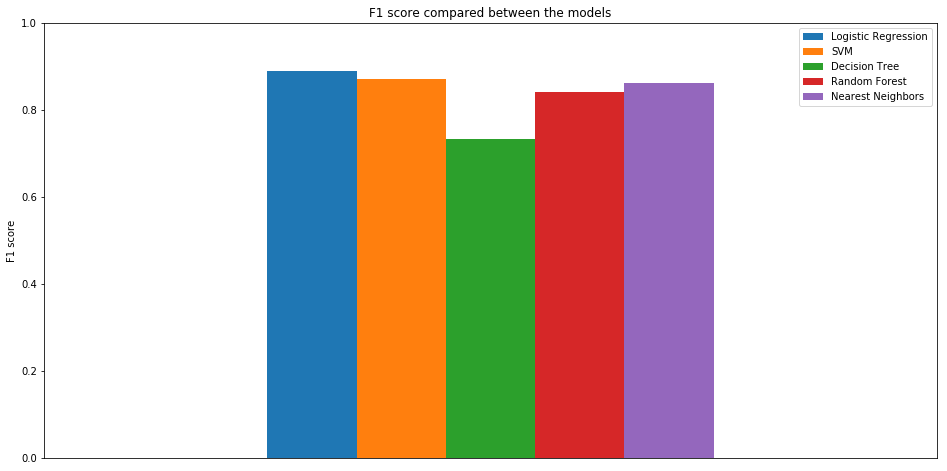

In [106]:
ax = pd.DataFrame(f1_score_dict).plot(kind='bar', figsize=(16,8), title="F1 score compared between the models")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel("F1 score")
ax.set_ylim(0,1)

(0, 1)

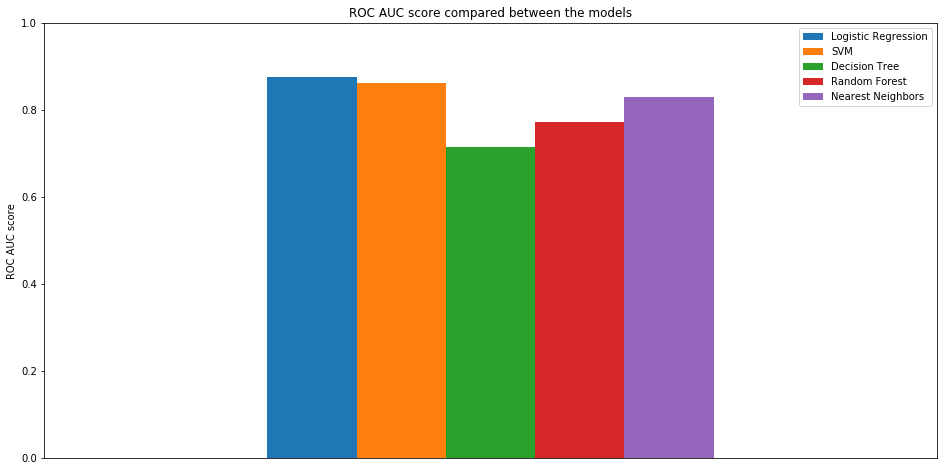

In [107]:
ax = pd.DataFrame(roc_auc_dict).plot(kind='bar', figsize=(16,8), title="ROC AUC score compared between the models")
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
ax.set_ylabel("ROC AUC score")
ax.set_ylim(0,1)


Conclusion: Overall, our best performing model is **Logistic Regression with ~ 88% accuracy, ~93% precision and ~89% F1 score.**


**Good F1 score means** that you have low false positives and low false negatives, so you're correctly identifying real threats and you are not disturbed by false alarms. An **F1 score is considered perfect when it's 1** , while the model is a total failure when it's 0.

So in our case 89% is pretty good result considering that I didn't do much fine-tuning or add more features.

Also, it is interesting to observe that Logistic Regression performed worse than other classifiers in TRAINING dataset, but eventually became the best in TEST dataset. 

I think, that is because the model of Logistic Regression was more general than other's and didn't overfit.